# PS 02

### 1 Cleaning data 

In [2]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1.1 Load the “gapminder” dataset
gap_data = pd.read_csv('gapminder.csv', sep = '\t')

In [4]:
# 1.2 Check how many rows and columns do we have
gap_data.shape

(13055, 25)

In [5]:
# 1.2 Check does the first five lines of data look reasonable
gap_data.head(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN


From the output, we can see that the dataset has 25 rows and 13055 columns. The first 10 lines of data look reasonable and the data fits the type that the column defines.But it is noticable that there is some NaN value in the dataset.

In [6]:
# 1.3 Check how many missing values are there in each variable
gap_data.isna().sum()

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

According to the output, nearly all variables has NaN values. Nonetheless, some variables contain a substantial number of NaN values, rendering them nearly ineffective for analysis. For instance, "intermediate-region", "youthFemaleLiteracy", "youthMaleLiteracy", "adultLiteracy", "accessElectricity", "agricultureTractors", "pm2.5_35", and "battleDeaths" contain a significant number of missing values and may not be suitable for analysis.

In contrast, variables such as "iso3", "iso2", "region", "sub-region", "time", and "totalPopulation" have comparatively fewer NaNvalues and can still be used for analysis. Variables such as "fertilityRate", "lifeExpectancy", "childMortality", "GDP_PC", "agriculturalLand", "cerealProduction", "fertilizerHa", "co2", "greenhouseGases", and "co2_PC" have a moderate number of missing values and can be used for analysis after the appropriate management of the missing values.

In [8]:
# 1.4 Analyze the cases with missing time
time_miss_data = gap_data[gap_data['time'].isna()][['name', 'iso2', 'totalPopulation']]
time_miss_data.sample(10)

,name,iso2,totalPopulation
11610,Tokelau,TK,NaN
9205,Pitcairn,PN,NaN
964,"Bonaire, Sint Eustatius and Saba",BQ,NaN
181,Åland Islands,AX,NaN
8664,Niue,NU,NaN
5779,Jersey,JE,NaN
8180,Montserrat,MS,NaN
4213,Guernsey,GG,NaN
1806,Bouvet Island,BV,NaN
1987,Cocos (Keeling) Islands,CC,NaN


#### 1.5
From the output, we can see that there are several cases where time is missing, and the total population is also missing in these cases. These cases are for territories rather than countries, and some of them, such as Tokelau and Pitcairn Territories, are not inhabited by a permanent population. The reasons may include difficulties in data collections, political complexities, small populations, or limited data sources. Therefore, it is understandable that the year of observation and the total population may not be available for these territories.

In [9]:
# 1.6 Check the name is missing but iso-2 code is there
len(gap_data[gap_data['name'].isna() & gap_data['iso2'].notna()])

0

In [10]:
# 1.6 Check iso-2 code is missing but name is there
len(gap_data[gap_data['name'].notna() & gap_data['iso2'].isna()])

60

In [11]:
# 1.6 The case where iso-2 code is missing but name is there
gap_data[gap_data['name'].notna() & gap_data['iso2'].isna()][['name', 'iso2']].name.value_counts()

Namibia    60
Name: name, dtype: int64

In [12]:
# Provide examples
gap_data[gap_data['name'].notna() & gap_data['iso2'].isna()][['name', 'iso2']].head()

,name,iso2
8363,Namibia,NaN
8364,Namibia,NaN
8365,Namibia,NaN
8366,Namibia,NaN
8367,Namibia,NaN


From the output, we can see that there is only Namibia has NaN values where iso-2 code is missing but name is there.

In [13]:
# 1.6 The case where name is missing but iso-2 code is there
gap_data[gap_data['name'].isna() & gap_data['iso2'].notna()][['name', 'iso2']].iso2.value_counts()

Series([], Name: iso2, dtype: int64)

In [14]:
# Provide examples
gap_data[gap_data['name'].isna() & gap_data['iso2'].notna()][['name', 'iso2']].head()

,name,iso2


From the output, there are 0 cases where the name is missing and iso-2 code is there.

In [15]:
# 1.7 Check the iso-2 code for Namibia in the datset
gap_data[gap_data['name'] == 'Namibia']['iso2'].values[0]

nan

#### 1.7
The iso2 code for Namibia is NA. From the above output, we can see that the iso-2 code for Namibia is missing(nan) in this dataset. It is possible that the iso-2 code for Namibia was not available at the time when the dataset was created or that there was an error in recording the iso-2 code for Namibia.The reason for this is not entirely clear, but it may be due to a number of factors, including historical reasons, administrative issues, or simply an oversight.

In [19]:
# 1.8 Check how many different countries are there in these data
gap_data['name'].nunique()

249

From the output, there are 249 countries in the dataset.

In [20]:
# 1.9 Check what is the earliest year in the dataset
gap_data['time'].min()

1960.0

In [21]:
# 1.9 Check what is the most recent year in the dataset
gap_data['time'].max()

2019.0

The earliest year is 1960 and the most recent year is 2019.

### 2 Wealth

In [22]:
# 2.1 Find the most recent year in the data set that includes GDP data
filtered_data = gap_data.dropna(subset=['GDP_PC'])
filtered_data['time'].max()

2019.0

The most recent year in the data set that includes GDP data is 2019.

In [23]:
# 2.2 Check the average wealth on this planet as of 2019
GDP_2019 = filtered_data[filtered_data["time"]== 2019]
average_gdp_2019 = GDP_2019["GDP_PC"].mean()
average_gdp_2019

15055.352217243239

The average GDP per capita across all countries in 2019 is 15055.352217.

In [24]:
# 2.3 Check which 5 countries countries have the largest number of the most recent years missing
time_max = filtered_data.groupby('name').time.max()
time_max_data = time_max.nsmallest(5)

In [25]:
check_index = filtered_data.set_index(['name', 'time']).index.isin(time_max_data.items())
most_recent_gdp = filtered_data.set_index(['name', 'time'])[check_index].reset_index()[['name', 'time']]
most_recent_gdp.columns = ['Country', 'Last year of GDP']
most_recent_gdp

,Country,Last year of GDP
0,Djibouti,2010.0
1,Eritrea,2011.0
2,Faroe Islands,2010.0
3,Liechtenstein,2010.0
4,Turks and Caicos Islands,2010.0


The 5 countries with the largest number of the most recent years missing are Djibouti, Faroe Islands, Liechtenstein, Turks and Caicos Islands, Eritrea. The reasons why these countries have issues with newer data without further analysis is possible because the lack of resources or infrastructure to collect and report accurate data, political instability or conflicts that affect the economy, or simply a lack of priority given to collecting and reporting economic data.

In [26]:
# 2.4 Compare the continents
sorted_gdp = GDP_2019.groupby('region')['GDP_PC'].mean().sort_values(ascending=False)
sorted_gdp

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

From the output, it looks reasonable. The Europe has the richest average wealth (i.e. average GDP per capita) in 2019, but the Africa has the poorest average wealth (i.e. average GDP per capita) in 2019. Europe has historically been an affluent continent with numerous high-income countries, whereas Africa has faced numerous economic obstacles and struggled with destitution. It is essential to note, however, that this is a simplification of the complex reality of global wealth distribution, as there are significant differences in GDP per capita between countries within each continent.

### 3 Descriptive Stats

In [27]:
3.1 # Compute minimum, maximum, median and mean wealth both in 1960
data_1960 = filtered_data[filtered_data['time'] == 1960]
min_wealth_1960 = data_1960.GDP_PC.min()
max_wealth_1960 = data_1960.GDP_PC.max()
median_wealth_1960 = data_1960.GDP_PC.median()
mean_wealth_1960 = data_1960.GDP_PC.mean()
print("Data for 1960:")
print("Min wealth in 1960:", min_wealth_1960)
print("Max wealth in 1960:", max_wealth_1960)
print("Median wealth in 1960:", median_wealth_1960)
print("Mean wealth in 1960:", mean_wealth_1960)

Data for 1960:
Min wealth in 1960: 153.34393
Max wealth in 1960: 33362.70762
Median wealth in 1960: 1751.86291
Mean wealth in 1960: 5050.295039780219


In [28]:
# Compute minimum, maximum, median and mean wealth both in 2019
data_2019 = filtered_data[filtered_data['time'] == 2019]
min_wealth_2019 = data_2019.GDP_PC.min()
max_wealth_2019 = data_2019.GDP_PC.max()
median_wealth_2019 = data_2019.GDP_PC.median()
mean_wealth_2019 = data_2019.GDP_PC.mean()
print("Data for 2019:")
print("Min wealth in 2019:", min_wealth_2019)
print("Max wealth in 2019:", max_wealth_2019)
print("Median wealth in 2019:", median_wealth_2019)
print("Mean wealth in 2019:", mean_wealth_2019)

Data for 2019:
Min wealth in 2019: 208.07473
Max wealth in 2019: 111043.5317
Median wealth in 2019: 5922.52759
Mean wealth in 2019: 15055.352217243239


From the output, in 1960, the minimum GDP per capita was 153.34393(USD), the maximum was 33362.70762(USD), the median was 1751.86291(USD), and the mean was 5050.2950(USD). In 2019, the minimum GDP per capita was 208.07473(USD), the maximum was 111043.53(USD), the median was 5922.52759(USD), and the mean was 15055.3522(USD).

#### 3.2
Between 1960 and 2019, both the median and mean GDP per capita have increased substantially, indicating that the world has become considerably wealthier. Minimum GDP per capita has not increased as much as maximum GDP per capita, indicating that some nations have not experienced the same level of economic growth as others. It is difficult to determine whether the world has become more or less equal based solely on these numbers because we lack information on the distribution of wealth within countries.

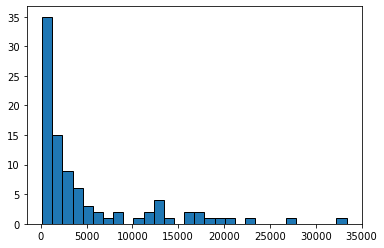

In [29]:
# 3.3 Plot histograms of world wealth for 1960
GDP_1960 = filtered_data[filtered_data['time'] == 1960]
GDP_1960_hist = plt.hist(GDP_1960.GDP_PC, bins = 30, edgecolor = 'black')

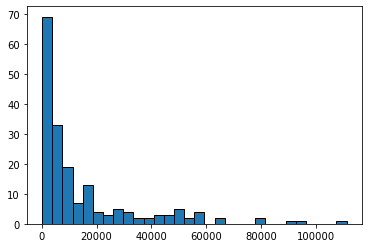

In [30]:
# Plot histograms of world wealth for 2019
GDP_2019 = filtered_data[filtered_data['time'] == 2019]
GDP_2019_hist = plt.hist(GDP_2019.GDP_PC, bins = 30, edgecolor = 'black')

#### 3.4
Comparing the world wealth histograms for 1960 and 2019, we can see that the distribution of two histogram are all right skewed with a large proportion of countries having low GDP per capita.It is noticable that the GDP per capita of 2019 is higher than the GDP per capita of 1996 because the maximum value of the x-scale of the GDP_2019_hist is 100,000 is higher than that value in GDP_1996_hist with the value of 35,000. The increasing GDP per capita over time can be explained by various factors such as technological advancements, globalization, and economic policies. Technological advancements have allowed for increased productivity and efficiency in many industries, leading to economic growth. However, it is also true that there are almost 70 countries with a GDP per capita of 0 in 2019, which indicates a high level of economic struggle in those countries. In contrast, there were only 35 countries with a GDP per capita of 0 in 1960, indicating that economic struggles may have increased in some parts of the world over time.This can contribute to the gap and inequality between rich and poor, as some countries and individuals may have significantly more resources and opportunities than others.

In [31]:
# 3.5 Compute the quintile share ratio of GDP per capita for 1960
q80_1960 = GDP_1960.GDP_PC.quantile(0.8)
q20_1960 = GDP_1960.GDP_PC.quantile(0.2)
sum_q20_1960 = np.sum(GDP_1960['GDP_PC'][GDP_1960['GDP_PC'] < q20_1960])
sum_q80_1960 = np.sum(GDP_1960['GDP_PC'][GDP_1960['GDP_PC'] > q80_1960])
quintile_ratio_1960 = sum_q80_1960 / sum_q20_1960
print("quintile ratio of 1960:", quintile_ratio_1960)

quintile ratio of 1960: 48.44796581082919


In [32]:
# Compute the quintile share ratio of GDP per capita for 2019
q80_2019 = GDP_2019.GDP_PC.quantile(0.8)
q20_2019 = GDP_2019.GDP_PC.quantile(0.2)
sum_q20_2019 = np.sum(GDP_2019['GDP_PC'][GDP_2019['GDP_PC'] < q20_2019])
sum_q80_2019 = np.sum(GDP_2019['GDP_PC'][GDP_2019['GDP_PC'] > q80_2019])
quintile_ratio_2019 = sum_q80_2019 / sum_q20_2019
print("quintile ratio of 2019:", quintile_ratio_2019)

quintile ratio of 2019: 57.22513517688509


The quintile share ratio is the ratio of the 80th percentile (the highest 20% of observations) to the 20th percentile (the lowest 20% of observations) of a given variable.The quintile share ratio of GDP per capita for 1960 is 48.44796581082919. This indicates that the best 20% of countries by GDP per capita in 1960 had a roughly 48.44 times greater income than the bottom 20% of countries.The quintile share ratio of GDP per capita for the year 2019 is 57.22513517688509. This indicates that the income of the highest 20% of countries by GDP per capita in 2019 was approximately 57.26 times that of the lowest 20% of countries. This suggests an increase in income inequality between 1960 and 2019.

In [33]:
# 3.6 Compute the Pareto ratio for the 1960
GDP_1960_sum = GDP_1960.GDP_PC.sum()
GDP_in_1960 = data_1960.GDP_PC
for i in range(99, 50, -1):
    GDP_1 = np.percentile(GDP_1960.GDP_PC, i)
    GDP_pct = GDP_in_1960[GDP_in_1960 > GDP_1].sum()/GDP_1960_sum
    if 100 * GDP_pct > i:
        print(i, GDP_pct)
        break

75 0.7539576669722627


In [34]:
# Compute the Pareto ratio for the 2019
GDP_2019_sum = GDP_2019.GDP_PC.sum()
GDP_in_2019 = GDP_2019.GDP_PC
for i in range(99, 50, -1):
    GDP_1 = np.percentile(GDP_2019.GDP_PC, i)
    GDP_pct = GDP_in_2019[GDP_in_2019 > GDP_1].sum()/GDP_2019_sum
    if 100 * GDP_pct > i:
        print(i, GDP_pct)
        break

74 0.7523323215392158


The Pareto ratio for 1960 is 25%. It means that the richest 25% owns 75.396% of total GDP. The Pareto ratio for 2019 is 26%. It means that the richest 26% owns 75.233% of total GDP. Based on the Pareto ratio, it can be concluded that there has been a slight increase in income inequality between 1960 and 2019, based on the Pareto ratio.

#### 3.7 
The data provided can be useful to provide some insight into how world inequality has changed over the last 60 years, but they have limitations and should be used in combination with other measures to get a more comprehensive picture.The quintile share ratio provides insights into the distribution of wealth among the top and bottom quintiles of the population, while the Pareto ratio measures the concentration of wealth held by the top 25% of the population. They are all efficient tools tell something about how the world inequality has changed over the last 60 years to us.However, they do not provide information on the distribution of income within each quintile or among the other 60% of countries. Moreover, other measures such as the Gini coefficient or income share of the top 1% can provide a more nuanced picture of income inequality, so we need more comprehensive data and detailed analysis to fully understand the nature and causes of inequality on a global scale. Nonetheless, they are useful tools to assess global trends in inequality and track changes over time.

### 4 Health 

In [35]:
# 4.1 Count how many countries do not have CM data for year 1960
gap_data[gap_data['time'] == 1960].childMortality.isna().sum()

104

In [36]:
# Count how many countries do not have CM data for year 2019
gap_data[gap_data['time'] == 2019].childMortality.isna().sum()

24

There are 104 countries lacking 1960 CM data. In 2019, there are 24 countries without CM data. From 1960 to 2019, the missing data for CM decreased, so the data have improved over time.

In [37]:
# 4.2 Compute the largest CM in data and find which years/countries does this correspond to
gap_data.nlargest(1, 'childMortality')[['childMortality', 'name', 'time']]

,childMortality,name,time
7703,420.6,Mali,1963.0


In [38]:
# Compute the smallest CM in data and find which years/countries does this correspond to
gap_data.nsmallest(1, 'childMortality')[['childMortality', 'name', 'time']]

,childMortality,name,time
10587,1.7,San Marino,2018.0


Mail has the maximum child mortality in 1963 with the number of 420.6. However, San Marino has the minimum child mortality in 2018 with the value of 1.7.

In [39]:
# 4.3 For each continent, check which country has largest CM (in 2019)
continent_group_2019 = gap_data[gap_data['time'] == 2019].groupby('region')
max_ids = continent_group_2019.childMortality.idxmax()
gap_data.loc[max_ids][['childMortality', 'name', 'region']]

,childMortality,name,region
8603,117.2,Nigeria,Africa
5176,62.8,Haiti,Americas
9144,67.2,Pakistan,Asia
7399,14.4,"Moldova, Republic of",Europe
6199,50.9,Kiribati,Oceania


In [103]:
# For each continent, check which country has smallest CM (in 2019)
min_ids = continent_group_2019.childMortality.idxmin()
gap_data.loc[min_ids][['childMortality', 'name', 'region']]

,childMortality,name,region
6679,11.5,Libya,Africa
1986,4.9,Canada,Americas
2890,2.3,Cyprus,Asia
10588,1.7,San Marino,Europe
663,3.6,Australia,Oceania


From the output, we know that Nigeria has the largest CM (in 2019) with the value of 117.2 and San Marino has the smallest CM (in 2019) with the value of 1.7.

### 5 Graphical Analysis 

In [104]:
# Find the max and min country
cm_2019 = gap_data[gap_data['time'] == 2019]
max_cm_id = cm_2019.childMortality.idxmax()
min_cm_id = cm_2019.childMortality.idxmin()
max_country = gap_data.loc[max_cm_id]['name']
min_country = gap_data.loc[min_cm_id]["name"]
print(max_country)
print(min_country)

Nigeria
San Marino


In [105]:
# Filter countries
cm_Nigeria = gap_data[gap_data.name == "Nigeria"][["name","childMortality","time"]]
cm_SM = gap_data[gap_data.name == "San Marino"][["name","childMortality","time"]]
cm_Turkey = gap_data[gap_data.name == "Turkey"][["name","childMortality","time"]]
cm_China = gap_data[gap_data.name == "China"][["name","childMortality","time"]]
cm_Japan = gap_data[gap_data.name == "Japan"][["name","childMortality","time"]]

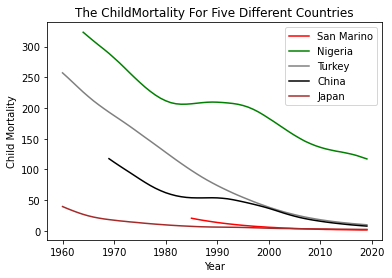

In [106]:
# Make the plot
plt.plot(cm_SM.time, cm_SM.childMortality, label="San Marino", color="Red")
plt.plot(cm_Nigeria.time, cm_Nigeria.childMortality, label="Nigeria", color="Green")
plt.plot(cm_Turkey.time, cm_Turkey.childMortality, label="Turkey", color="Grey")
plt.plot(cm_China.time, cm_China.childMortality, label="China", color="Black")
plt.plot(cm_Japan.time, cm_Japan.childMortality, label="Japan", color="Brown")
_ = plt.xlabel("Year")
_ = plt.ylabel("Child Mortality")
_ = plt.title("The ChildMortality For Five Different Countries")  
plt.legend()
plt.show()

From the graph, we can notice that the all the countries have a downward trends. Nigeria has the highest Child Mortality from 1960 to 2019, followed by the Turkey and the China with a dramatic downward trend. It is noticeable that the Child Mortality of Turkey and China almost tends to be overlap from year 1998.The last two countries are Japan and San Morino. They are almost flat in this time period but the San Marino has the lowest value in 2019.

### How much time did you spend on this PS?
I spent almost 7h on this PS.